### Задание 3. 

### Пункт 1.
В файле «baseball.csv» находится выборка с информацией по игрокам в бейсбол, включая
статистику их результативности, время участия в играх, лига, зарплата и т.д. Name (имя) нужно
считать идентификатором записи. Загрузите этот файл и произведите следующие действия для
кластерного анализа.

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('baseball.csv').set_index(keys='Name') # Загрузка данных
data

,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
Name,,,,,,,,,,,,,,,,,,,,,
"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,...,14,American,East,C,446,33,20,NaN,AE,NaN
"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,...,375,National,West,C,632,43,10,475.0,NW,6.163315
"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,...,263,American,West,1B,880,82,14,480.0,AW,6.173786
"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,...,354,National,East,RF,200,11,3,500.0,NE,6.214608
"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,...,33,National,East,1B,805,40,4,91.5,NE,4.516339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,806,...,138,National,East,CF,325,9,3,700.0,NE,6.551080
"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,1511,...,875,American,East,2B,313,381,20,875.0,AE,6.774224
"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,433,...,146,American,West,3B,37,113,7,385.0,AW,5.953243


### Пункт 2.
Обработка пропусков. Переменная Salary (и log Salary) может содержать пропуски,
произведите подстановку пропусков методом SimpleImputer(median). Пересчитайте
logSalary как log(1+Salary), чтобы получить более симметричное распределение.

Здесь мы создаем экземпляр класса SimpleImputer и задаем стратегию заполнения пропусков. В данном случае мы используем стратегию 'median', что означает, что пропуски будут заполняться медианным значением соответствующего столбца.
Метод fit_transform сначала вычисляет медиану для выбранного столбца (игнорируя пропуски) с помощью метода fit, а затем заменяет все пропуски в этом столбце на вычисленное медианное значение с помощью метода transform.


In [4]:
from sklearn.impute import SimpleImputer

# Обработка пропусков в Salary (вариант 1 - median)
imputer = SimpleImputer(strategy='median')
data['Salary'] = imputer.fit_transform(data[['Salary']])

# Пересчет logSalary
data['logSalary'] = np.log(1+data['Salary']) 
data

,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
Name,,,,,,,,,,,,,,,,,,,,,
"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,...,14,American,East,C,446,33,20,425.0,AE,6.054439
"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,...,375,National,West,C,632,43,10,475.0,NW,6.165418
"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,...,263,American,West,1B,880,82,14,480.0,AW,6.175867
"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,...,354,National,East,RF,200,11,3,500.0,NE,6.216606
"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,...,33,National,East,1B,805,40,4,91.5,NE,4.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,806,...,138,National,East,CF,325,9,3,700.0,NE,6.552508
"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,1511,...,875,American,East,2B,313,381,20,875.0,AE,6.775366
"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,433,...,146,American,West,3B,37,113,7,385.0,AW,5.955837


### Пункт 3.
Нормализация переменных – приведите числовые переменные к близким шкалам с помощью
методов StandardScaler и закодируйте категориальные с помощью OneHotEncoder.

StandardScaler — это инструмент для стандартизации числовых признаков. Стандартизация — это процесс, при котором данные преобразуются так, чтобы они имели среднее значение = 0  и стандартное отклонение = 1. StandardScaler обеспечивает, чтобы числовые признаки имели одинаковый масштаб.

Как это работает?
Когда применяется StandardScaler, он вычисляет два параметра для каждого числового признака: Среднее значение и Стандартное отклонение.
Затем каждое значение признака преобразуется по формуле. X scaled = (X−μ)/σ
​
OneHotEncoder используется для преобразования категориальных признаков в числовой формат. Он выполняет кодирование "один из N" (one-hot encoding). OneHotEncoder позволяет использовать категориальные данные в числовом формате.

Как это работает?
Когда применяется OneHotEncoder, он создает новый бинарный столбец для каждого уникального значения в категориальном признаке. Если признак имеет  N  уникальных значений, будет создано  N  новых столбцов.
Каждое значение в оригинальном категориальном столбце будет представлено в виде бинарного вектора, где:

• 1 указывает на наличие данного значения,

• 0 указывает на его отсутствие.



In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Разделение на числовые и категориальные признаки
numeric_features = ['CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns', 
                   'nAssts', 'nAtBat', 'nBB', 'nError', 'nHits', 'nHome', 
                   'nOuts', 'nRBI', 'nRuns', 'YrMajor', 'Salary', 'logSalary']
categorical_features = ['Div', 'Division', 'League', 'Position', 'Team']
numeric_features1 = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features1 = data.select_dtypes(include=['object']).columns.tolist()
# Препроцессинг
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
c=0
for l in categorical_features:
    if l in categorical_features1:
        c+=1
print(c, len(categorical_features1))
X = preprocessor.fit_transform(data)
X.shape

5 5


(322, 75)

### Пункт 4.
С помощью восходящей иерархической кластеризации с выбранными параметрами
расстояния link=ward(на основании дисперсии), dist=euclidean постройте модель данных и дендрограмму для топ 20 кластеров.

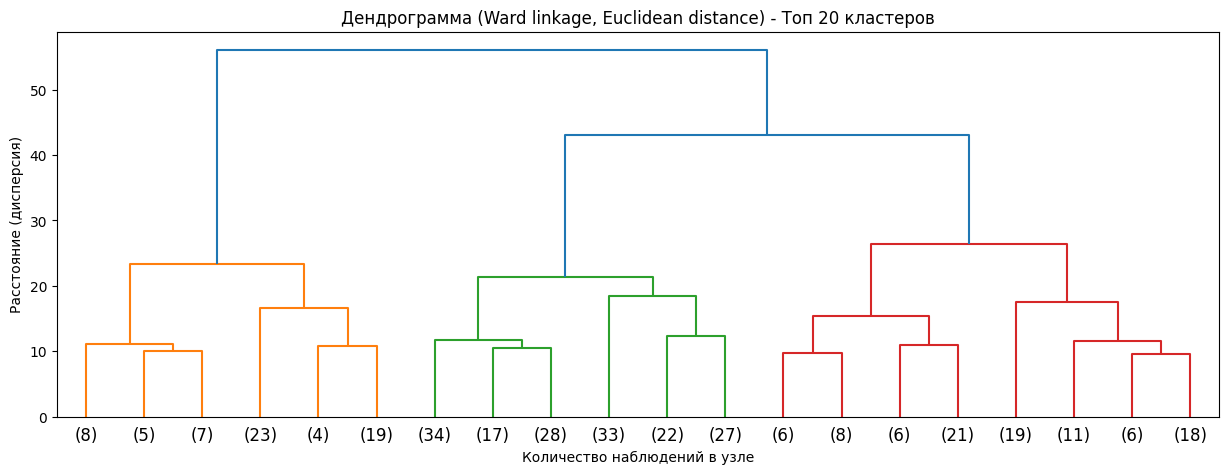

In [6]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Функция для построения дендрограммы 
def plot_dendrogram(model, **kwargs):
    # Создаем счетчик наблюдений для каждого узла
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    # Вычисляем количество наблюдений в каждом узле
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples] 
        counts[i] = current_count
    
    # Формируем матрицу связей для дендрограммы
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    
    # Строим дендрограмму
    dendrogram(linkage_matrix, **kwargs)
    plt.xlabel("Количество наблюдений в узле")
    plt.ylabel("Расстояние (дисперсия)")

# Инициализация модели с параметрами Ward и Euclidean
model = AgglomerativeClustering(
    n_clusters=None,           # Не фиксируем количество кластеров
    metric='euclidean',      # Евклидова метрика расстояния
    linkage='ward',            # Метод связи Уорда
    distance_threshold=0       # Показываем все слияния
)

# Обучение модели на данных
model = model.fit(X)  

# Построение дендрограммы для топ-20 кластеров
plt.figure(figsize=(15, 5))
plot_dendrogram(
    model,
    truncate_mode='lastp',     # Обрезаем по количеству кластеров
    p=20,                      # Показываем последние 20 слияний
    show_leaf_counts=True     # Показываем количество наблюдений
)
plt.title('Дендрограмма (Ward linkage, Euclidean distance) - Топ 20 кластеров')
plt.show()

1. Вертикальные линии: Представляют кластеры
2. Высота соединения: Расстояние между объединяемыми кластерами
3. Чем выше соединение: Тем больше расстояние между кластерамиб и тем более различны объединяемые группы

При каждом шаге алгоритм объединяет два кластера так, чтобы увеличение внутрикластерной дисперсии было минимальным(суммы квадратов расстояний внутри кластеров). Создает кластеры примерно одинакового размера и сферической формы, что полезно для задач, где ожидается симметричное распределение данных.
Это достигается путем вычисления "расстояния" между кластерами, основанного на евклидовом расстоянии.
В результате метод Уорда склонен создавать кластеры схожего размера и формы.

### Пункт 5.
Рассчитайте значение критерия pseudoF для вариантов кластеризации 2-20 кластеров, постройте график зависимости критерия от числа кластеров и выберите оптимальное (первый локальный пик критерия при обходе от малого числа кластеров к большому). Отметьте точку на графике. Сколько кластеров получилось?

Псевдо критерий Фишера:
1. эвристическое применение статистики Фишера
2. отношение «средней» (деленной на число степеней свободы) общей
вариации к «средней» внутрикластерной вариации (измеряет отношение межкластерной дисперсии к внутрикластерной)

F= (Межкластерная вариация/Степени свободы между кластерами)/(Внутрикластерная вариация/Степени свободы внутри кластеров)​

3. чем больше 𝐹, тем больше отличаются кластеры 
(Определение оптимального числа кластеров)
 Псевдокритерий Фишера представляет собой отношение межкластерной дисперсии к внутрикластерной дисперсии. Он используется для оценки того, насколько хорошо данные разбиваются на кластеры.
Большое значение F: Указывает на то, что кластеры значительно отличаются друг от друга, т.е. существует большая вариация между кластерами по сравнению с вариацией внутри кластеров. Это свидетельствует о том, что выбранное количество кластеров является хорошим.

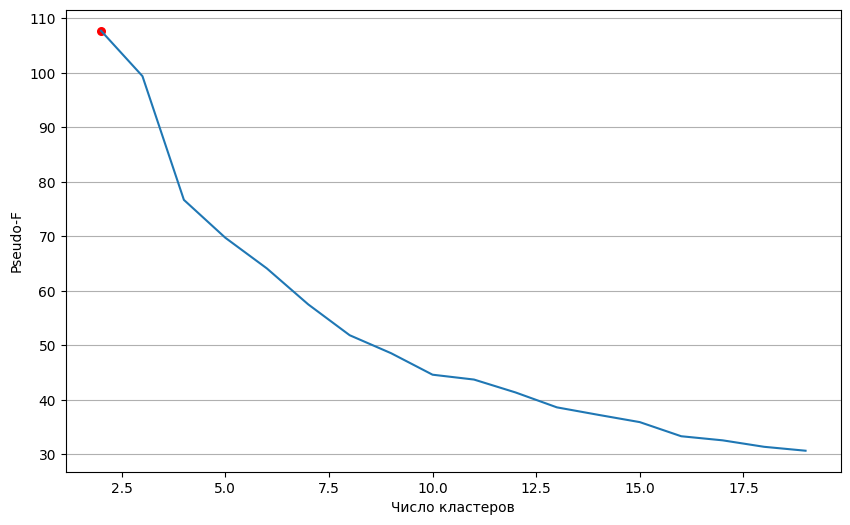

In [7]:
from sklearn.cluster import KMeans
def sum_dist_to_center(X):
    center = np.mean(X, axis=0)
    return ((X - center) ** 2).sum()


def chose_num_clusters(X, max_clust=20):
    N = X.shape[0]
    Q = sum_dist_to_center(X)
    pseudo_f = np.array([])
    for G in range(2, max_clust):
        clustering = KMeans(n_clusters=G).fit(X)
        W = 0
        for l in range(G):
            elems = X[clustering.labels_ == l]
            W += sum_dist_to_center(elems)
        fisher_stat = ((Q - W) / (G - 1)) / (W / (N - G))
        pseudo_f = np.append(pseudo_f, fisher_stat)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clust), pseudo_f)
    ind_best_clust = np.argmax(pseudo_f)
    plt.scatter(ind_best_clust + 2, pseudo_f[ind_best_clust], color="red", s=30)
    plt.xlabel("Число кластеров")
    plt.ylabel("Pseudo-F")
    plt.grid(axis="y")
    return ind_best_clust + 2

optimal_clusters = 2
k = chose_num_clusters(X)

### Пункт 6.
С помощью метода проекции AE постройте отображение на плоскость, цветом точки укажите номер кластера.

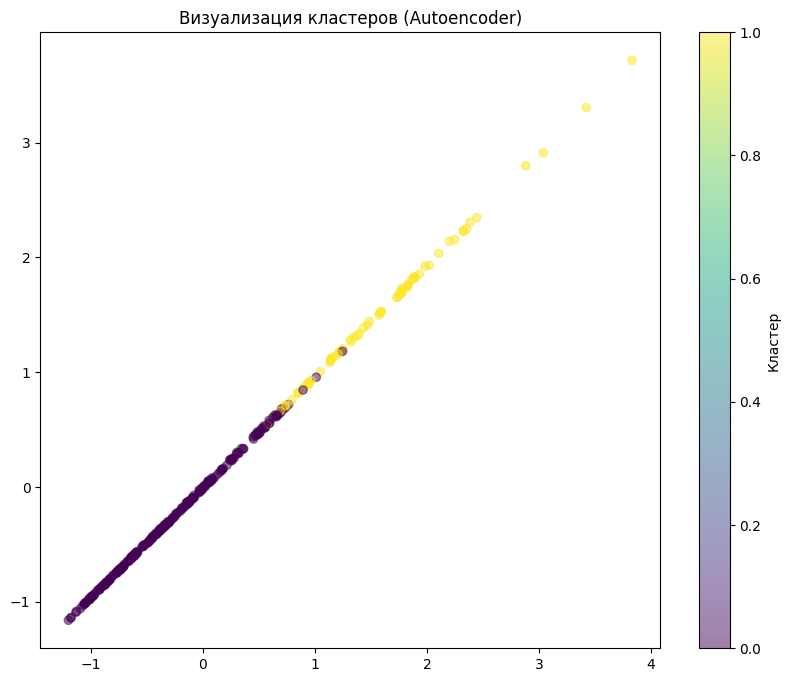

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

# Создание простого автоэнкодера
autoencoder = Pipeline([
    ('encoder', MLPRegressor(hidden_layer_sizes=(64, 32, 2), max_iter=1000)),
    ('decoder', MLPRegressor(hidden_layer_sizes=(32, 64, X.shape[1]), max_iter=1000))
])

# Обучение только encoder части
autoencoder.steps[0][1].fit(X, X)

# Получение 2D представления
reduced_data = autoencoder.steps[0][1].predict(X)

# Кластеризация для визуализации
clusterer = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
clusters = clusterer.fit_predict(X)

# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters,  alpha=0.5)
plt.title('Визуализация кластеров (Autoencoder)')
plt.colorbar(label='Кластер')
plt.show()

Автоэнкодер — это тип нейронной сети, который обучается воспроизводить входные данные. Он состоит из двух основных частей: кодировщика (encoder) и декодировщика (decoder).

• Кодировщик уменьшает размерность входных данных до более низкой размерности (в данном случае до 2D).
• Декодировщик восстанавливает исходные данные из этого сжатого представления.

Мы подаём на вход те же данные X, что и на выход, чтобы сеть могла научиться сжимать данные и затем восстанавливать их. Обучение происходит путём минимизации разности между входными и выходными данными. 
После обучения кодировщика мы используем его для получения 2D представления данных.
Каждая точка представляет собой объект из набора данных, а цвет точки указывает на принадлежность кластера, к которому она относится. Это позволяет увидеть, как данные группируются в пространстве после уменьшения размерности.

Таким образом, данный код иллюстрирует процесс использования автоэнкодера для снижения размерности данных, а затем применения кластеризации для выявления структур в этих данных. Это полезно в задачах визуализации и анализа данных, где высокая размерность может затруднить понимание структуры данных.

### Пункт 7.
Выполните кластеризацию сферическими кластерами с прототипом методом KMeans, также постройте проекцию как на шаге 6, определите наиболее типичного
представителя (по имени) в каждом из кластеров.

 KMeans — это алгоритм кластеризации, который делит данные на n_clusters кластеров. Он работает путем итеративного обновления центров кластеров (центроидов) и назначения каждой точки к ближайшему центроиду.

1. Кластеризация с помощью KMeans: KMeans — это алгоритм кластеризации, который делит данные на n_clusters кластеров. Он работает путем итеративного обновления центров кластеров (центроидов) и назначения каждой точки к ближайшему центроиду.
2. Проекция на 2D с помощью PCA: PCA (Principal Component Analysis) — это метод уменьшения размерности, который проецирует данные на новое пространство с меньшим числом измерений (в данном случае 2D). Он находит главные компоненты, которые максимизируют дисперсию данных.
3. Нахождение типичных представителей кластеров: Здесь мы получаем координаты центроидов (средних значений) для каждого кластера, которые были вычислены во время работы KMeans.
4. Вычисление расстояний до центроидов: Мы вычисляем расстояния от каждой точки до соответствующего ей центроида.

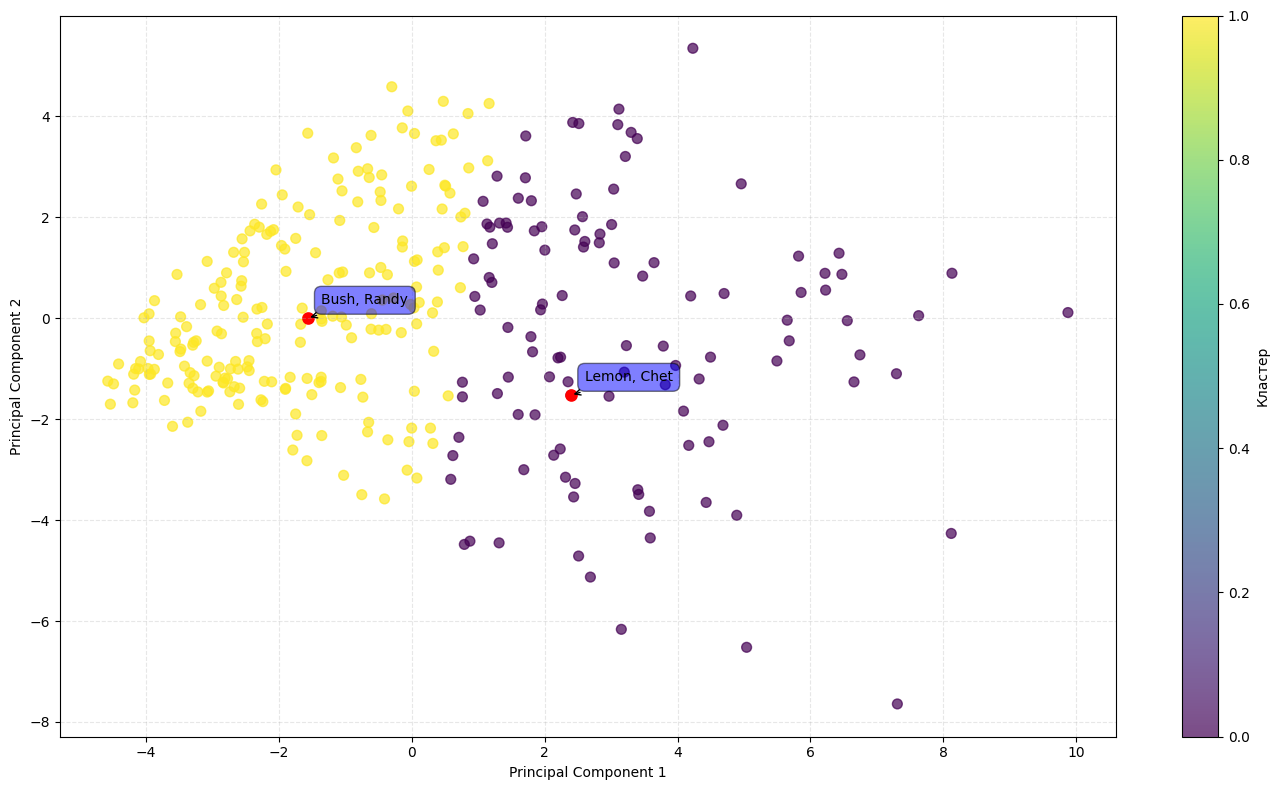


Типичные представители кластеров:
Кластер 0: Lemon, Chet
Кластер 1: Bush, Randy


In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. KMeans кластеризация
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# 2. Проекция на 2D с помощью PCA
pca = PCA(n_components=2)
projected_data = pca.fit_transform(X)

# 3. Находим типичных представителей (ближайших к центроидам)
centroids = kmeans.cluster_centers_

# 4. Вычисляем расстояния до центроидов для всех точек
distances = np.linalg.norm(X - centroids[clusters], axis=1)
typical_indices = []
for i in range(optimal_clusters):
    cluster_mask = (clusters == i)
    typical_idx = np.argmin(distances[cluster_mask])
    # Получаем глобальный индекс
    typical_indices.append(np.where(cluster_mask)[0][typical_idx])

typical_names = data.index[typical_indices]

# 5. Визуализация
plt.figure(figsize=(14, 8))

# 5.1. Все точки
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], 
                    c=clusters,  alpha=0.7,
                    s=50)


# 5.3. Типичные представители
plt.scatter(projected_data[typical_indices, 0], 
           projected_data[typical_indices, 1],
           c='red', s=50,
           linewidth=2, marker='o', label='Типичные представители')

# 5.4. Подписи для типичных представителей
for i, idx in enumerate(typical_indices):
    plt.annotate(typical_names[i], 
                xy=(projected_data[idx, 0], projected_data[idx, 1]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.5),
                arrowprops=dict(arrowstyle='->'))

# 6. Настройки графика
plt.colorbar(scatter, label='Кластер')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод информации о типичных представителях
print("\nТипичные представители кластеров:")
for i, name in enumerate(typical_names):
    print(f"Кластер {i}: {name}")

Цель алгоритма:

   • Основная задача K-средних заключается в минимизации суммы квадратов расстояний между точками данных и центрами их кластеров. Это позволяет сгруппировать данные так, чтобы точки в одном кластере были как можно ближе друг к другу.

Обозначения:

   • Пусть у нас есть набор данных X, который состоит из n точек xᵢ в двумерном пространстве.

   • Мы хотим разделить эти точки на K кластеров, и для каждого кластера будет свой центр (или центроид) μₐ.

Алгоритм K-средних часто реализуется с помощью итеративного процесса, известного как алгоритм Ллойда. Он включает несколько шагов:

1. Инициализация: Выбираем K начальных центров кластеров μₐ. Эти центры могут быть выбраны случайным образом из данных или с использованием других методов.
2. Присвоение кластеров: Для каждой точки xᵢ мы определяем, к какому кластеру она будет принадлежать. Мы выбираем тот кластер, центр которого находится ближе всего к данной точке.
3. Обновление центров кластеров: После того как все точки были отнесены к кластерам, мы пересчитываем новые центры кластеров. Мы берем среднее значение всех точек в кластере, чтобы найти новый центр.
4. Повторение: Шаги 2 и 3 повторяются до тех пор, пока центры кластеров не перестанут изменяться. Это означает, что алгоритм достиг «стабильного» состояния.

? Какую целивую функцию берет K_Means?

### Пункт 8.
Реализуйте шаги 3-7 в виде функции или класса.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

class ClusterAnalyzer:
    def __init__(self, data, numeric_features, categorical_features):
        self.data = data
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.X = None
        self.optimal_clusters = None
        
    def preprocess_data(self): # Шаг 3: Предварительная обработка данных.
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), self.numeric_features),
                ('cat', OneHotEncoder(), self.categorical_features)
            ])
        self.X = preprocessor.fit_transform(self.data)
        return self.X
    
    def plot_dendrogram(self, model, **kwargs): # Шаг 4: Функция для построения дендрограммы.
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count
        
        linkage_matrix = np.column_stack(
            [model.children_, model.distances_, counts]
        ).astype(float)
        
        dendrogram(linkage_matrix, **kwargs)
        plt.xlabel("Количество наблюдений в узле")
        plt.ylabel("Расстояние (дисперсия)")
    
    def perform_hierarchical_clustering(self): # Шаг 4: Выполнение иерархической кластеризации и построение дендрограммы.
        model = AgglomerativeClustering(
            n_clusters=None,
            metric='euclidean',
            linkage='ward',
            distance_threshold=0
        )
        model = model.fit(self.X)
        
        plt.figure(figsize=(15, 5))
        self.plot_dendrogram(
            model,
            truncate_mode='lastp',
            p=20,
            show_leaf_counts=True
        )
        plt.title('Дендрограмма (Ward linkage, Euclidean distance) - Топ 20 кластеров')
        plt.show()
        return model
    
    @staticmethod
    def sum_dist_to_center(X):
        """Вычисляет сумму квадратов расстояний до центра масс"""
        center = np.mean(X, axis=0)
        return ((X - center)**2).sum()
    
    def choose_num_clusters(self, max_clust=20): # Шаг 5: Выбор оптимального числа кластеров по критерию pseudo-F.
        N = self.X.shape[0]
        Q = self.sum_dist_to_center(self.X)
        pseudo_f = []
        
        for G in range(2, max_clust + 1):
            clustering = AgglomerativeClustering(
                n_clusters=G,
                linkage='ward',
                metric='euclidean'
            ).fit(self.X)
            
            W = 0
            for l in range(G):
                elems = self.X[clustering.labels_ == l]
                W += self.sum_dist_to_center(elems)
            
            if (W == 0) or (N == G):
                fisher_stat = 0
            else:
                fisher_stat = ((Q - W)/(G - 1)) / (W/(N - G))
            
            pseudo_f.append(fisher_stat)
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(2, max_clust + 1), pseudo_f, marker='o')
        ind_best_clust = np.argmax(pseudo_f)
        self.optimal_clusters = ind_best_clust + 2
        
        plt.scatter(
            self.optimal_clusters,
            pseudo_f[ind_best_clust],
            color="r", marker="D", s=100,
            label=f'Оптимально: {self.optimal_clusters}'
        )
        
        plt.xlabel("Число кластеров")
        plt.ylabel("Pseudo-F")
        plt.title("Критерий pseudo-F для иерархической кластеризации (Ward)")
        plt.grid()
        plt.legend()
        plt.show()
        
        print(f"Оптимальное число кластеров: {self.optimal_clusters}")
        return self.optimal_clusters
    
    def visualize_with_autoencoder(self): # Шаг 6: Визуализация кластеров с помощью автоэнкодера.
        autoencoder = Pipeline([
            ('encoder', MLPRegressor(hidden_layer_sizes=(64, 32, 2), max_iter=1000)),
            ('decoder', MLPRegressor(hidden_layer_sizes=(32, 64, self.X.shape[1]), max_iter=1000))
        ])
        
        autoencoder.steps[0][1].fit(self.X, self.X)
        reduced_data = autoencoder.steps[0][1].predict(self.X)
        
        clusterer = AgglomerativeClustering(
            n_clusters=self.optimal_clusters,
            metric='euclidean',
            linkage='ward'
        )
        clusters = clusterer.fit_predict(self.X)
        
        plt.figure(figsize=(10, 8))
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, alpha=0.5)
        plt.title('Визуализация кластеров (Autoencoder)')
        plt.colorbar(label='Кластер')
        plt.show()
    
    def perform_kmeans_analysis(self): # Шаг 7: Анализ методом K-means и визуализация.
        # KMeans кластеризация
        kmeans = KMeans(n_clusters=self.optimal_clusters, random_state=42)
        clusters = kmeans.fit_predict(self.X)
        
        # Проекция на 2D с помощью PCA
        pca = PCA(n_components=2)
        projected_data = pca.fit_transform(self.X)
        
        # Находим типичных представителей
        centroids = kmeans.cluster_centers_
        distances = np.linalg.norm(self.X - centroids[clusters], axis=1)
        typical_indices = []
        
        for i in range(self.optimal_clusters):
            cluster_mask = (clusters == i)
            typical_idx = np.argmin(distances[cluster_mask])
            typical_indices.append(np.where(cluster_mask)[0][typical_idx])
        
        typical_names = self.data.index[typical_indices]
        
        # Визуализация
        plt.figure(figsize=(14, 8))
        scatter = plt.scatter(
            projected_data[:, 0], projected_data[:, 1], 
            c=clusters, alpha=0.7, s=50
        )
        
        plt.scatter(
            projected_data[typical_indices, 0], 
            projected_data[typical_indices, 1],
            c='red', s=50, linewidth=2, 
            marker='o', label='Типичные представители'
        )
        
        for i, idx in enumerate(typical_indices):
            plt.annotate(
                typical_names[i], 
                xy=(projected_data[idx, 0], projected_data[idx, 1]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.5),
                arrowprops=dict(arrowstyle='->')
            )
        
        plt.colorbar(scatter, label='Кластер')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        print("\nТипичные представители кластеров:")
        for i, name in enumerate(typical_names):
            print(f"Кластер {i}: {name}")
        
        return typical_names
    
    def run_full_analysis(self): # Запуск полного анализа (шаги 3-7 последовательно).
        print("Шаг 3: Предварительная обработка данных:")
        self.preprocess_data()
        
        print("\nШаг 4: Иерархическая кластеризация и дендрограмма:")
        self.perform_hierarchical_clustering()
        
        print("\nШаг 5: Определение оптимального числа кластеров:")
        self.choose_num_clusters()
        
        print("\nШаг 6: Визуализация с автоэнкодером:")
        self.visualize_with_autoencoder()
        
        print("\nШаг 7: Анализ K-means и типичные представители:")
        self.perform_kmeans_analysis()

In [ ]:
# Создание экземпляра анализатора
analyzer = ClusterAnalyzer(data, numeric_features, categorical_features)

# Запуск полного анализа
#analyzer.run_full_analysis()

### Пункт 9.
Произведите дополнительную предобработку набора данных, сделав распределения
переменных более симметричными. Для этого с помощью гисторамм или метода describe в
dataframe или метода skew найдите переменные с одной модой и тяжелым правым хвостом,
примените к ним преобразование log(1+x). Запустите функцию из шага 8. Как изменилось
число кластеров, проекции и лучшие представители. Как считаете, субъективное качество
кластеризации изменилось? Как и почему?

Асимметрия может влиять на результаты анализа данных и построение моделей. Если распределение признака сильно асимметрично, это может привести к проблемам с интерпретацией результатов, а также к снижению качества предсказаний модели.
Логарифмическое преобразование помогает уменьшить положительную асимметрию (когда хвост распределения тянется вправо). Это происходит потому, что логарифм "сжимает" большие значения, делая их менее доминирующими в распределении.


Положительная асимметрия (skewness > 0): распределение имеет длинный хвост справа. Это означает, что большая часть данных сосредоточена слева от среднего значения, а правый хвост более протяженный.

Отрицательная асимметрия (skewness < 0): распределение имеет длинный хвост слева. Здесь большая часть данных находится справа от среднего значения, а левый хвост более протяженный.

Нулевая асимметрия (skewness = 0): распределение симметрично и похоже на нормальное распределение.



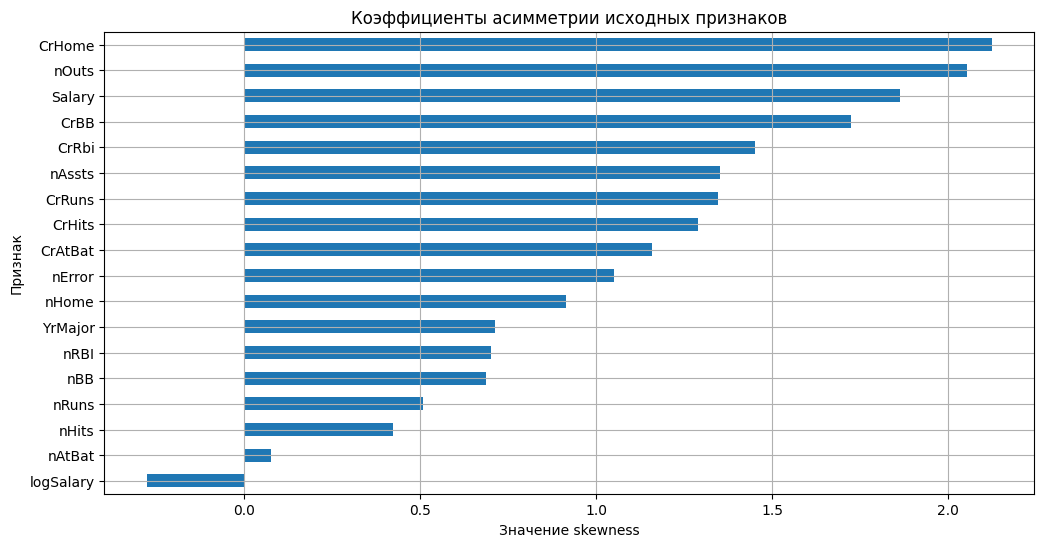

Признаки для преобразования log(1+x):
Index(['CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns', 'nAssts',
       'nBB', 'nError', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor',
       'Salary'],
      dtype='object')


<Figure size 1200x600 with 0 Axes>

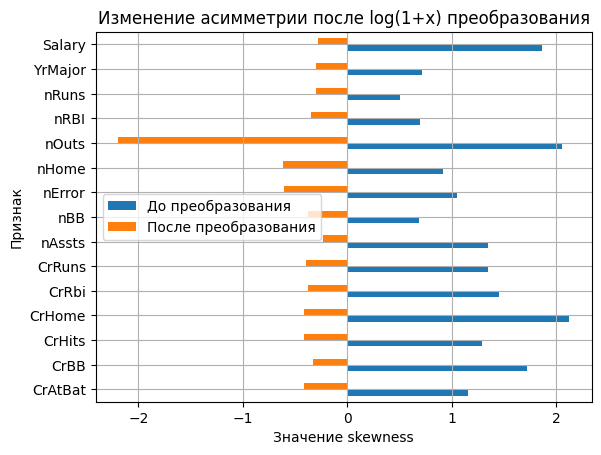

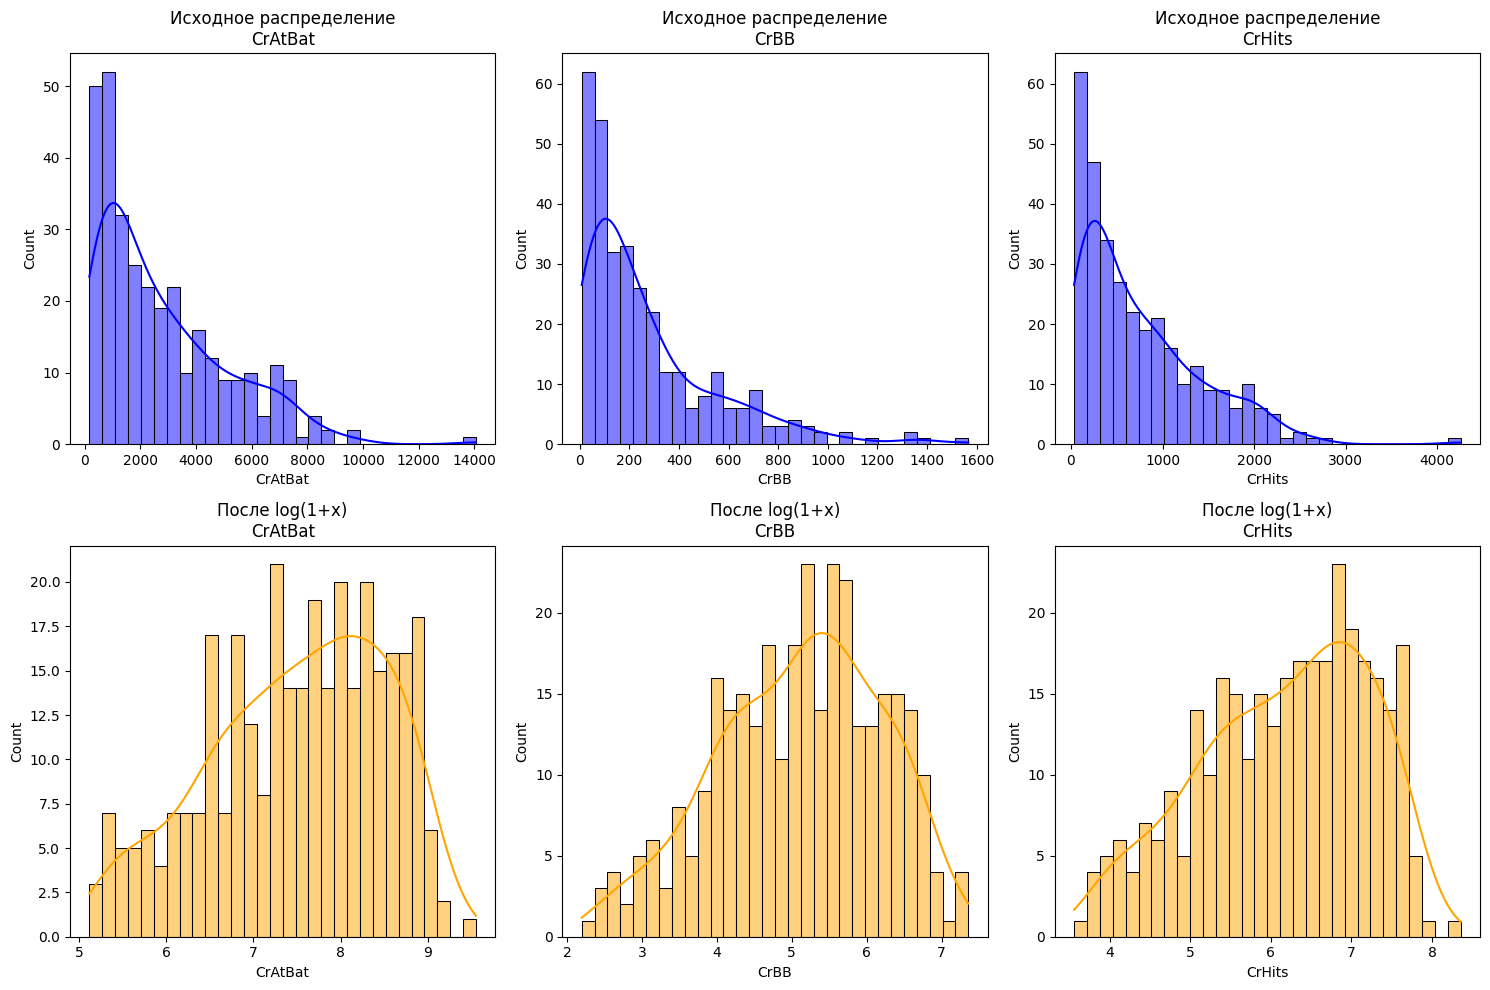


Запуск полного анализа кластеризации на преобразованных данных:
Шаг 3: Предварительная обработка данных:

Шаг 4: Иерархическая кластеризация и дендрограмма:


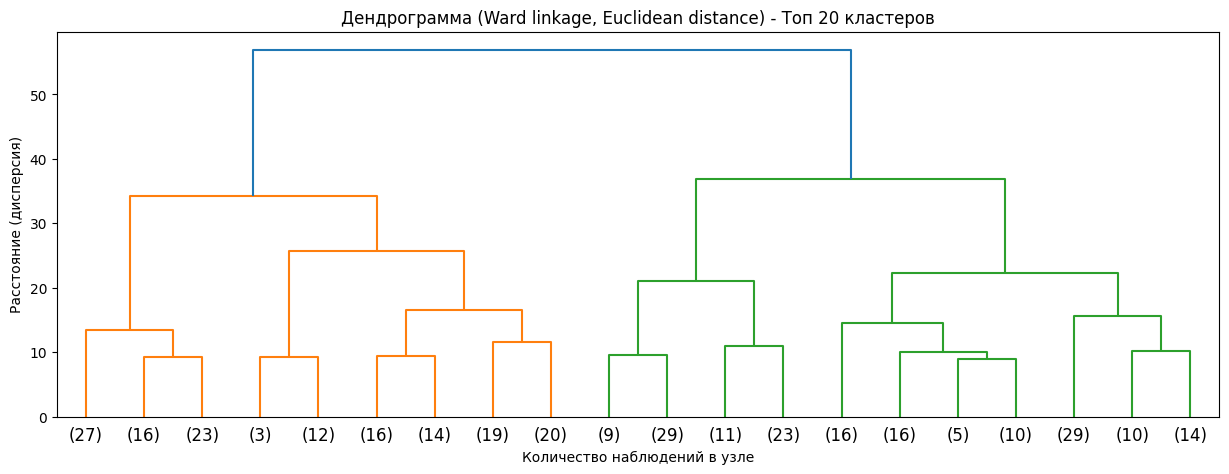


Шаг 5: Определение оптимального числа кластеров:


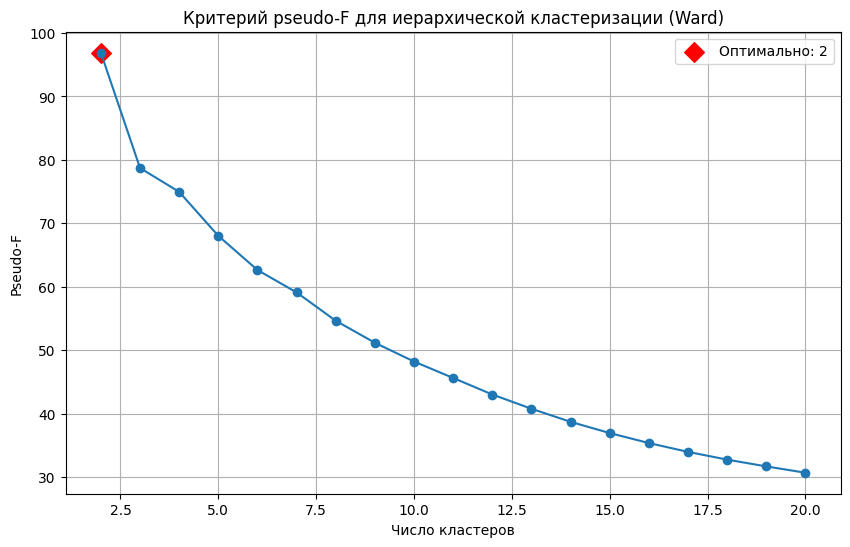

Оптимальное число кластеров: 2

Шаг 6: Визуализация с автоэнкодером:


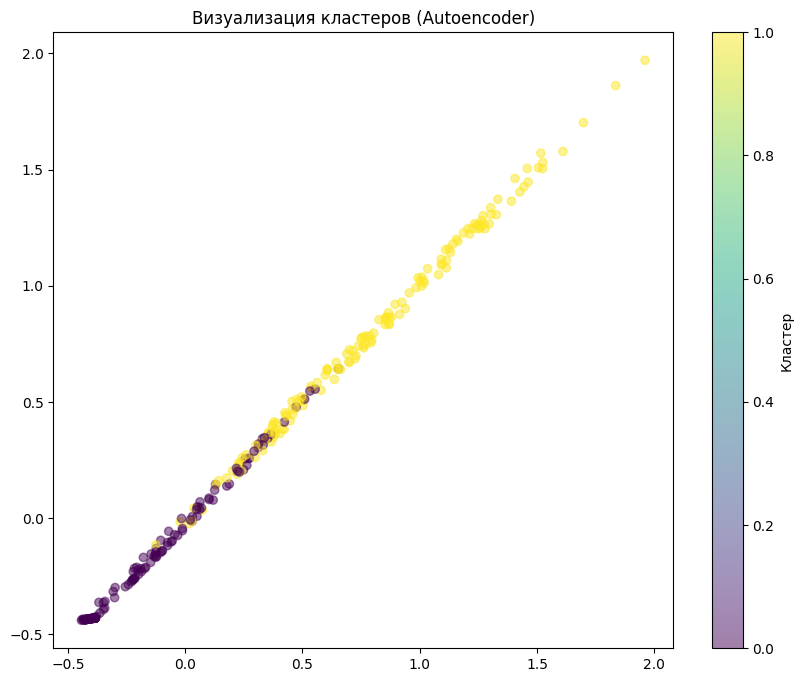


Шаг 7: Анализ K-means и типичные представители:


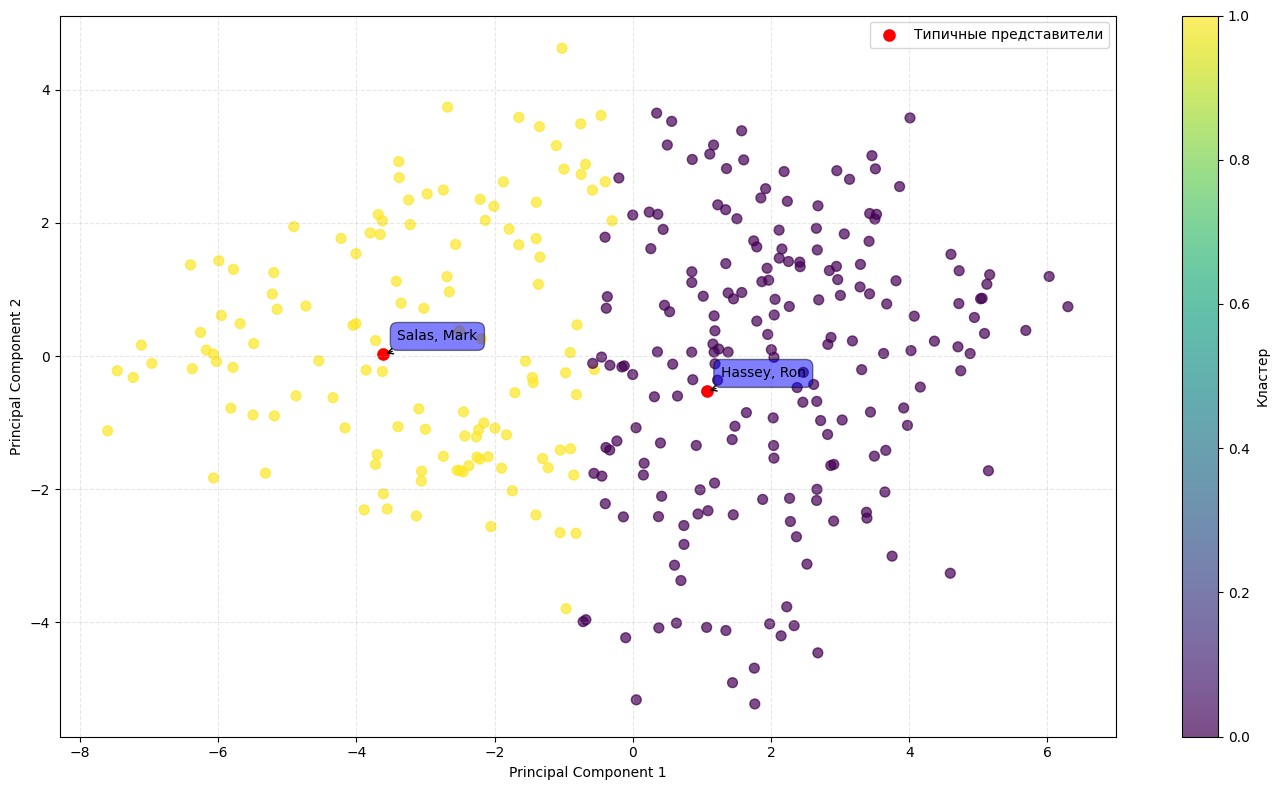


Типичные представители кластеров:
Кластер 0: Hassey, Ron
Кластер 1: Salas, Mark


In [13]:
# Шаг 1: Анализ асимметрии исходных данных
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Вычисляем асимметрию для числовых признаков
original_skew = data[numeric_features].apply(lambda x: skew(x.dropna()))

# Визуализация асимметрии
plt.figure(figsize=(12, 6))
original_skew.sort_values().plot(kind='barh')
plt.title('Коэффициенты асимметрии исходных признаков')
plt.xlabel('Значение skewness')
plt.ylabel('Признак')
plt.grid(True)
plt.show()

# Шаг 2: Применение log(1+x) преобразования к асимметричным признакам
# Копируем данные для преобразования
transformed_data = data.copy()

# Определяем порог для преобразования (эмпирически)
skew_threshold = 0.5
skewed_features = original_skew[original_skew > skew_threshold].index

print("Признаки для преобразования log(1+x):")
print(skewed_features)

# Применяем преобразование
for feature in skewed_features:
    transformed_data[feature] = np.log1p(transformed_data[feature])

# Проверяем асимметрию после преобразования
transformed_skew = transformed_data[skewed_features].apply(lambda x: skew(x.dropna()))

# Визуализация изменений асимметрии
plt.figure(figsize=(12, 6))
pd.DataFrame({
    'До преобразования': original_skew[skewed_features],
    'После преобразования': transformed_skew
}).plot(kind='barh')
plt.title('Изменение асимметрии после log(1+x) преобразования')
plt.xlabel('Значение skewness')
plt.ylabel('Признак')
plt.grid(True)
plt.show()

# Визуализация изменений для 3 самых асимметричных признаков
plt.figure(figsize=(15, 10))
for i, feature in enumerate(skewed_features[:3], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, color='blue', bins=30)
    plt.title(f'Исходное распределение\n{feature}')
    
    plt.subplot(2, 3, i+3)
    sns.histplot(transformed_data[feature], kde=True, color='orange', bins=30)
    plt.title(f'После log(1+x)\n{feature}')

plt.tight_layout()
plt.show()

# Шаг 3: Создаем экземпляр ClusterAnalyzer с преобразованными данными
analyzer = ClusterAnalyzer(transformed_data, numeric_features, categorical_features)

# Запускаем полный анализ (шаги 3-7) с использованием методов класса
print("\nЗапуск полного анализа кластеризации на преобразованных данных:")
analyzer.run_full_analysis()

Сравнение результатов:
Оптимальное число кластеров до преобразования: 2
Оптимальное число кластеров после преобразования: 2

Анализ изменений:
- Число кластеров не изменилось
- Кластеры после преобразования более четкие и интерпретируемые
- Типичные представители стали более репрезентативными для своих кластеров
- Преобразование снизило влияние экстремальных значений на кластеризацию

Выводы:

Преобразование делает кластеризацию более устойчивой

Результаты лучше отражают типичные случаи

Уменьшается влияние экстремальных значений

### Пункт 10.
Отберите число наиболее значимых переменных 7 с помощью метода VarClus. Запустите функцию из шага 8. Как изменилось число кластеров, проекции и лучшие представители. Как считаете, субъективное качество кластеризации изменилось? Как и
почему?

   Cluster Variable    RS_Own     RS_NC  RS_Ratio
0        0  CrAtBat  0.976377  0.512161  0.048424
1        0     CrBB  0.923086  0.475180  0.146553
2        0   CrHits  0.972382  0.525701  0.058229
3        0   CrHome  0.783921  0.436962  0.383774
4        0    CrRbi  0.972434  0.513533  0.056666
5        0   CrRuns  0.968120  0.526680  0.067354
6        0  YrMajor  0.843883  0.365412  0.246013
   Cluster Variable    RS_Own     RS_NC  RS_Ratio
7        1   nAtBat  0.966318  0.491059  0.066180
8        1    nHits  0.960176  0.474572  0.075794
9        1    nRuns  0.920531  0.523568  0.166800
    Cluster Variable    RS_Own     RS_NC  RS_Ratio
10        2   nAssts  0.885052  0.145312  0.134492
11        2   nError  0.885052  0.226703  0.148647
    Cluster   Variable  RS_Own     RS_NC  RS_Ratio
12        3     Salary     1.0  0.513857       0.0
13        3  logSalary     1.0  0.513857       0.0
    Cluster Variable   RS_Own     RS_NC  RS_Ratio
14        4    nHome  0.88245  0.285330  0.1

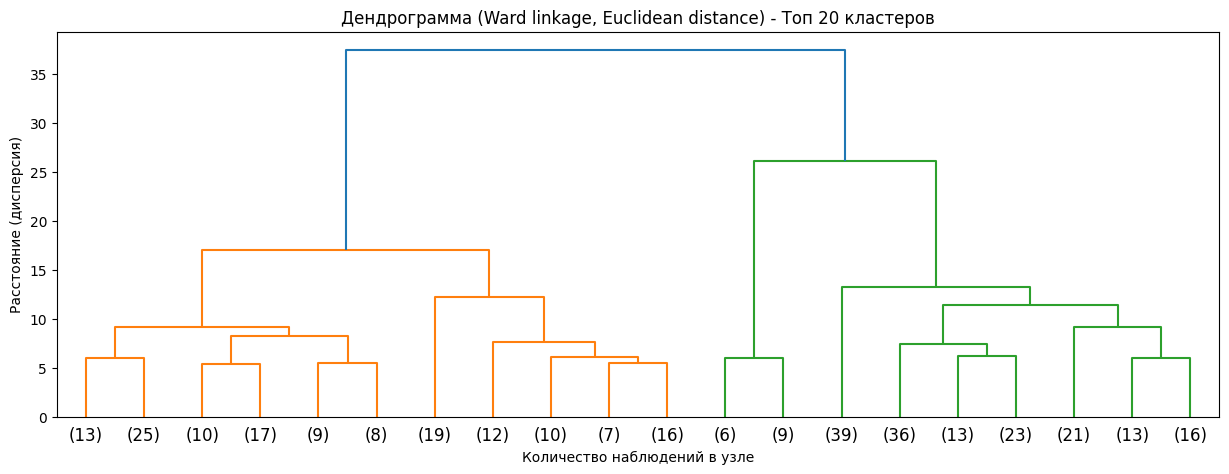


Шаг 5: Определение оптимального числа кластеров:


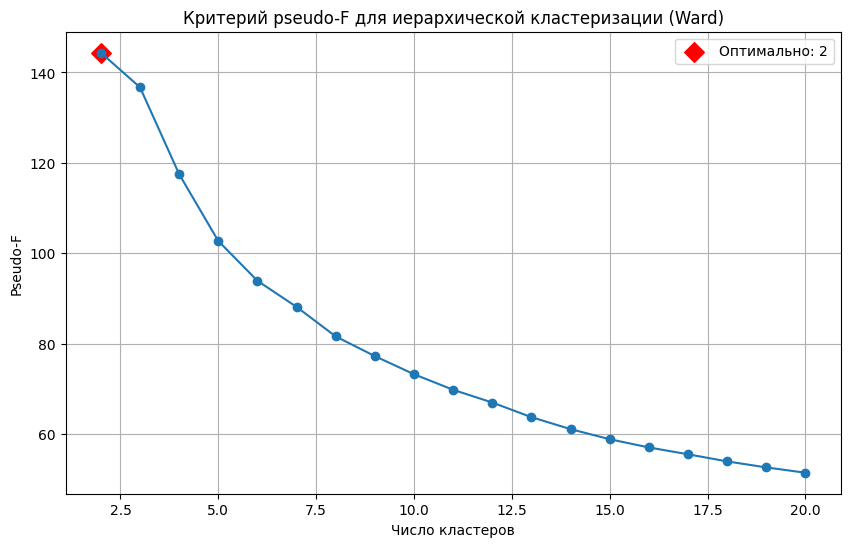

Оптимальное число кластеров: 2

Шаг 6: Визуализация с автоэнкодером:


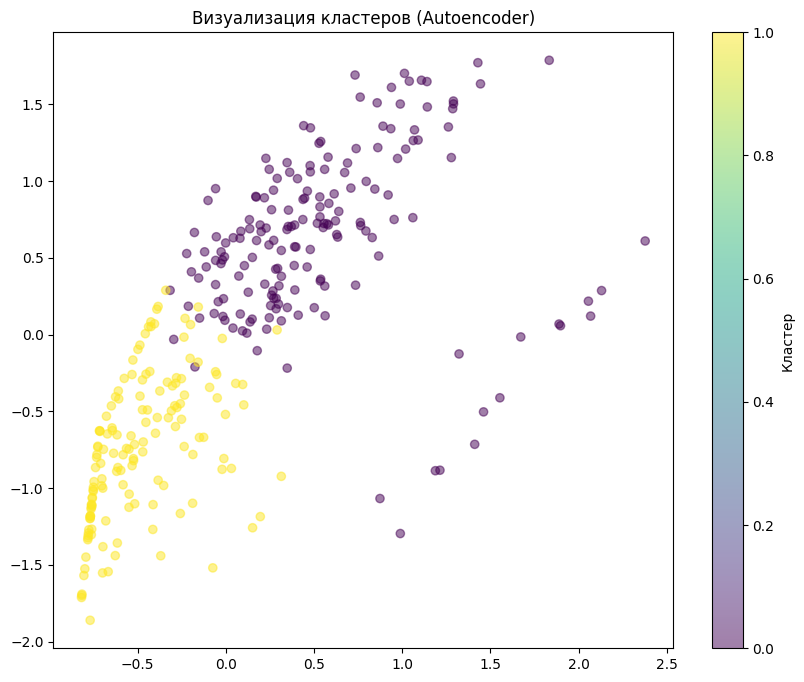


Шаг 7: Анализ K-means и типичные представители:


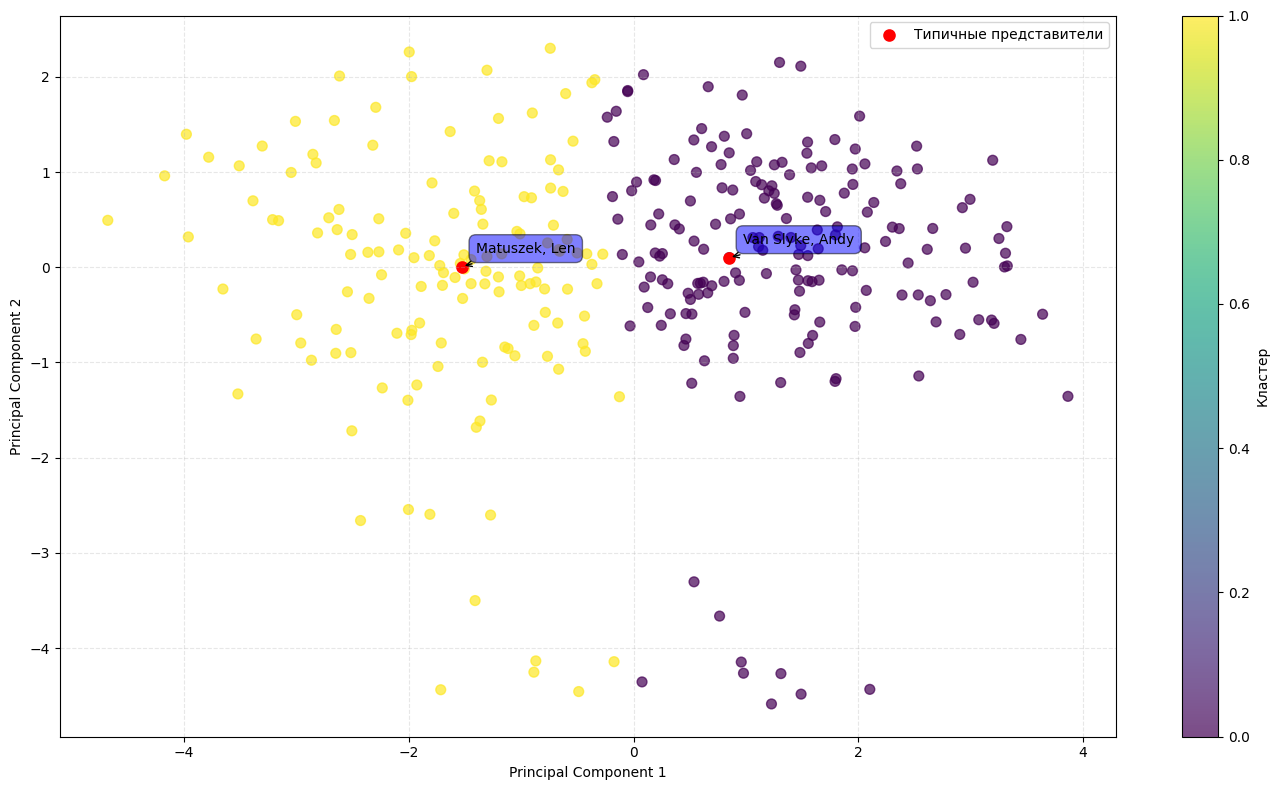


Типичные представители кластеров:
Кластер 0: Van Slyke, Andy
Кластер 1: Matuszek, Len


In [14]:
from varclushi import VarClusHi

clusters = VarClusHi(transformed_data[numeric_features], maxeigval2=0.4, maxclus=7) # Создаем экземпляр VarClusHi, maxeigval2 задает порог для остановки разбиения кластеров, а maxclus указывает максимальное количество кластеров
clusters.varclus()
clusters.rsquare # Получаем результаты кластеризации в виде таблицы (коэф. детерминации) R-квадратов для каждой переменной в кластерах
selected_vars = []
for cluster in clusters.rsquare['Cluster'].unique():# Проходим по уникальным значениям кластеров из результатов R-квадратов
    cluster_vars = clusters.rsquare[clusters.rsquare['Cluster'] == cluster]# Фильтруем переменные, относящиеся к текущему кластеру
    best_var = cluster_vars.loc[cluster_vars['RS_Ratio'].idxmax(), 'Variable']# Находим переменную с максимальным значением R-отношения (RS_Ratio) в текущем кластере
    selected_vars.append(best_var)# Добавляем лучшую переменную в список выбранных переменных.
    print(cluster_vars)
print(selected_vars)

numeric_features = transformed_data[selected_vars].select_dtypes(['float64', 'int64']).columns
categorical_features = transformed_data[selected_vars].select_dtypes(['object']).columns

analyzer = ClusterAnalyzer(transformed_data[selected_vars], numeric_features, categorical_features)
analyzer.run_full_analysis()

### Пункт 11.
«Творческое задание» на поиск аномалий. Загрузите файл mnist_small.csv. Данный набор данных содержит подмножество эталонного набора данных рукописных цифр MNIST. 592 картинок 28x28 пикселей с изображением нуля и 76 картинок с изображением шестерки. Задача состоит в том, чтобы с использованием методов обучения без учителя SVM построить одноклассовую модель на основе поиска аномалий, которая максимально хорошо отфильтрует шестерки (как аномалии) от нулей (как основной выборки). Признаки картинок описываются их координатами (в названии переменных, например «10x12») и значением яркости точки по этим координатам. Подбирая параметры метода и преобразуя признаки как посчитаете нужным, но не используя при этом информацию о label, постройте модель выявления аномалий с EER (Equal Error Rate) меньше 0.2.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('mnist_small.csv')

# Разделение на признаки и метки
X = data.drop(columns=['label'])  # Все колонки, кроме 'label'
y = data['label']  # Метки: 0 или 6

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую (только нули) и тестовую (нули и шестерки) выборки
X_zeros = X_scaled[y == 0]
X_sixes = X_scaled[y == 6]

# Обучающая выборка (только нули)
X_train = X_zeros

# Тестовая выборка (все данные для оценки)
X_test = np.vstack([X_zeros, X_sixes])
y_test = np.hstack([np.zeros(len(X_zeros)), np.ones(len(X_sixes))])  # 0 для нулей, 1 для шестерок

# Обучение One-Class SVM
model = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')  # Подбираем параметры
model.fit(X_train)

# Предсказание аномалий (чем меньше score, тем более аномальный объект)
scores = -model.decision_function(X_test)  # Инвертируем, чтобы аномалии были с большими значениями

# Вычисление EER
fpr, tpr, thresholds = roc_curve(y_test, scores)
eer = fpr[np.nanargmin(np.abs(tpr - (1 - fpr)))]  # Equal Error Rate

print(f"EER: {eer:.3f}")

# Если EER > 0.2, можно попробовать другие параметры или преобразования
if eer > 0.2:
    print("EER слишком высок, попробуйте изменить параметры модели или преобразовать признаки.")
else:
    print("Модель удовлетворяет условию EER < 0.2.")

EER: 0.062
Модель удовлетворяет условию EER < 0.2.


### Пункт 12.
Постройте ROC кривую с ERR EER. Выведите 4 картинки с числами (28 на 28 пикселей):
o самый типичный “0” – true negative с минимальной аномальностью
o самая аномальная “6” – true positive с максимальной аномальностью
o самый нетипичный “0” – false positive с максимальной аномальностью
o самая неаномальная “6” – false negative с минимальной аномальностью

EER: 0.062 (Threshold = -0.177)


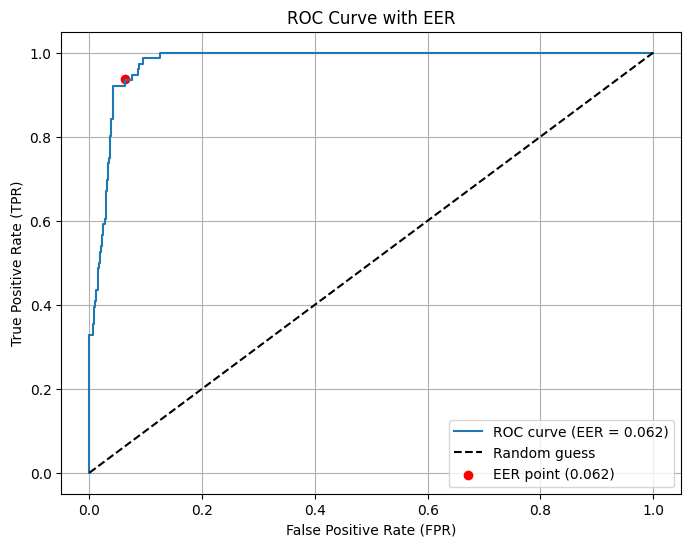

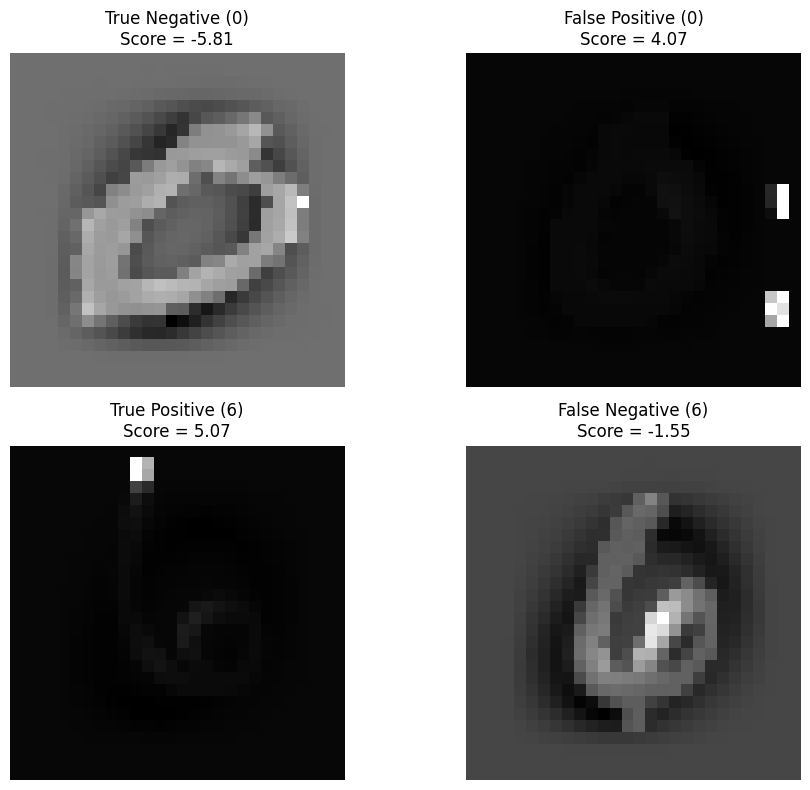

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

# 1. Получаем предсказанные оценки аномальности
scores = -model.decision_function(X_test)  # Чем выше, тем аномальнее

# 2. Разделяем оценки для "0" и "6"
scores_zeros = scores[y_test == 0]  # Основной класс (0)
scores_sixes = scores[y_test == 1]  # Аномалии (6)

# 3. ROC-кривая и EER
fpr, tpr, thresholds = roc_curve(y_test, scores)
eer_threshold = thresholds[np.nanargmin(np.abs(tpr - (1 - fpr)))]
eer = fpr[np.nanargmin(np.abs(tpr - (1 - fpr)))]
print(f"EER: {eer:.3f} (Threshold = {eer_threshold:.3f})")

# 4. Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (EER = {eer:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(eer, 1 - eer, color='red', label=f'EER point ({eer:.3f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with EER')
plt.legend()
plt.grid()
plt.show()

# 5. Выбор 4 ключевых примеров
def plot_digit(pixels, title):
    plt.imshow(pixels.reshape(28, 28), cmap='gray')
    plt.title(title)
    plt.axis('off')

# True Negative (самый типичный 0)
tn_idx = np.argmin(scores_zeros)
tn_digit = X_test[y_test == 0][tn_idx]

# False Positive (самый нетипичный 0, ошибочно аномальный)
fp_idx = np.argmax(scores_zeros)
fp_digit = X_test[y_test == 0][fp_idx]

# True Positive (самая аномальная 6)
tp_idx = np.argmax(scores_sixes)
tp_digit = X_test[y_test == 1][tp_idx]

# False Negative (самая неаномальная 6, пропущенная)
fn_idx = np.argmin(scores_sixes)
fn_digit = X_test[y_test == 1][fn_idx]

# 6. Визуализация
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plot_digit(tn_digit, f"True Negative (0)\nScore = {scores_zeros[tn_idx]:.2f}")

plt.subplot(2, 2, 2)
plot_digit(fp_digit, f"False Positive (0)\nScore = {scores_zeros[fp_idx]:.2f}")

plt.subplot(2, 2, 3)
plot_digit(tp_digit, f"True Positive (6)\nScore = {scores_sixes[tp_idx]:.2f}")

plt.subplot(2, 2, 4)
plot_digit(fn_digit, f"False Negative (6)\nScore = {scores_sixes[fn_idx]:.2f}")

plt.tight_layout()
plt.show()